# CHAPTER 24: Nonconvex Optimization

### This code runs simulations for Example 2 and generates figures 1, 2 and 6 from Chapter 24: Nonconvex Optimization (vol I)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Semanur Avşar 

Required Libraries:

1. numpy
2. matplotlib

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import scipy.linalg as la
import random
from tqdm import tqdm

In [17]:
import warnings
warnings.filterwarnings('ignore')

## 24.1.2 First-Order Stationarity

We start with the following definition. We say that a  point $ w \in \mathbb{R}^M $ is $O(\mu)$- *first-order stationarity* if:

$$
\|\nabla_{w}\,P(w)\|^2 \le O(\mu) \quad (O(\mu)\text{-first-order stationarity}) \tag{24.5}
$$

where $\mu$ is a small parameter (it will correspond to the step size parameter in the stochastic gradient algorithm). The above expression requires the squared norm of the gradient vector at $w$ to be small and on the order of the step size, $\mu$. Points $w$ satisfying ($24.5$) are only *approximately* first-order stationary because *exact* first-order stationarity requires $ \nabla_{w}\,\, P(w) = 0 $.  Moreover, points $w$ satisfying ($24.5$) can be "close" to any type of stationary points such as local or global minima, local or global maxima, or saddle points where the gradient vector is zero. These possibilities are illustrated in Fig. $24.1$, which depicts a risk function in two-dimensional space with global and local maxima, global and local minima, as well as saddle points (such as the saddle point indicated in the figure and appearing between two "hills" on the surface of the plot). A saddle point is neither a local maximum nor a local minimum for the function. While the gradient vector of the risk is zero at a saddle location, its Hessian matrix will be indefinite.

In light of relation ($24.4$), for risks with $ \delta $-Lipschitz gradients, $O(\mu)$-first-order stationarity is a *necessary condition* to have  both $ P(w)-P(w^{\star}) \le O(\mu) $ and $ \| w - w^{\star} \|^2 \le O(\mu)$ since

$$
\| w - w^{\star} \|^2 \le O(\mu) \Rightarrow P(w)-P(w^{\star}) \le O(\mu) \Rightarrow \|\nabla_{w}\,P(w)\|^2 \le O(\mu) \tag{24.6}
$$

That is, if the excess risk $P(w)-P(w^{\star})$ is small, then $w$ is $O(\mu)-$first-order stationary. However, the converse is not true in general. 
Unless the risk $P(w)$ is assumed to be additionally strongly convex, $O(\mu)-$first order stationarity *is not sufficient* to guarantee that the point $ w $ has small excess risk $ P(w)-P(w^{\star}) $ or small distance to the minimizer $ \| w - w^{\star} \|^2 $. This is because establishing sufficiency requires $24.3$, which only holds for *strongly convex* costs. This conclusion is consistent with the fact that the set of $ O(\mu) $-first-order stationary points for nonconvex risk functions includes the set of local minima, maxima, and saddle points.

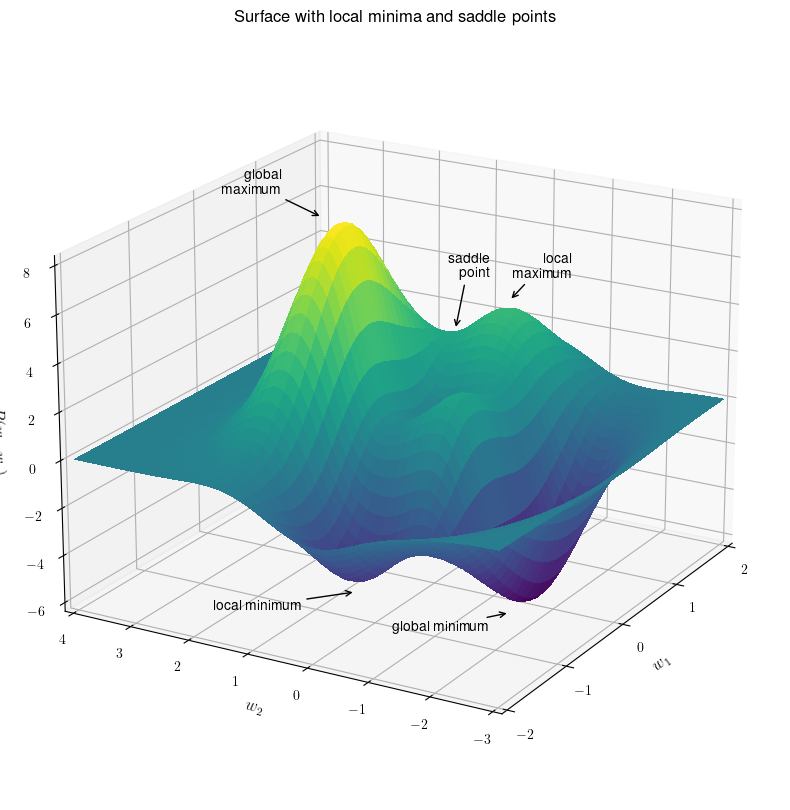

In [12]:
# generate figure 1 
x_values = np.arange(-2, 2.01, 0.01)
y_values = np.arange(-3, 4.01, 0.01)
X, Y = np.meshgrid(x_values, y_values)
h = np.zeros_like(X)

for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        h[j, i] = 3*(1-x**2)*np.exp(-x**2-(y+1)**2) - (1/3)*np.exp(-(x+1)**2-y**2) - 10*((x/5)-x**3-y**5)*np.exp(-x**2-y**2) 
        # a third surface with local minim

# Figure 1 (risk function with multiple stationary points)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
S = ax.plot_surface(X, Y, h, cmap='viridis', linewidth=0, antialiased=False)
ax.set_xlabel(r'$w_1$', fontsize=12)
ax.set_ylabel(r'$w_2$', fontsize=12)
ax.set_zlabel(r'$P(w_1,w_2)$', fontsize=12)
ax.set_title('Surface with local minima and saddle points')
ax.view_init(elev=20, azim=-150) # change the axis orientation to fit the figure in the book
ax.set_xticks(np.arange(-2,3,1))
ax.set_xlim([-2,2])
ax.set_yticks(np.arange(-3,5,1))
ax.set_ylim([-3,4])

ax.annotate('global \n maximum', xy= (-0.02, 0.045), xytext= (-0.03, 0.05), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold',ha='right', va='bottom')
ax.annotate('local minimum', xy= (-0.012, -0.045), xytext= (-0.025, -0.05), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold',ha='right', va='bottom')
ax.annotate('global minimum', xy= (0.025, -0.05), xytext= (0.020, -0.055), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold',ha='right', va='bottom')
ax.annotate('saddle \n point', xy= (0.012, 0.018), xytext= (0.02, 0.03), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold',ha='right', va='bottom')
ax.annotate('local \n maximum', xy= (0.025, 0.025), xytext= (0.040, 0.03), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold',ha='right', va='bottom')

plt.savefig("figs/fig_1.pdf", format="pdf")

plt.show()

**Figure 24.1** Plot of a risk function with global and local maxima, global and local minima, and saddle points.


## 24.1.4 Strict Saddle Points

By choosing $ \tau $ small enough in $(24.10)$ we are able to exclude first-order stationary points where the smallest eigenvalue of the Hessian matrix is negative and bounded away from zero. We will refer to these undesirable points as strict saddle points (which include both local maxima and saddle points). Specifically, we say that a point $ w \in \mathbb{R}^M $ is a $\tau$-*strict saddle point* if it is $ O(\mu) $-first-order stationary but satisfies

$$
\lambda_{\min} \Bigl( \nabla^2_w\, P(w) \Bigr) \le -\tau \quad (O(\mu)\text{-strict saddle point}) \tag{24.12}
$$

Note that the only difference in relation to definition $(24.10)$  is the reversal of the inequality. In other words, the set of $ \tau$-strict saddle points is the complement of the set of $\tau$-second-order stationary points.

Note that, depending on the choice of the parameter $ \tau $, not all saddle points of the risk $ P(w) $ need to be $ \tau $-strict saddle points. If $ P(w) $ happens to have a saddle point where $ - \tau \le \lambda_{\min}\left( \nabla_{w}^2 P(w) \right) < 0 $, then this particular saddle point would not be $ \tau $-strict  and would instead fall under definition ($24.10$) of a $ \tau $-second-order stationary point. Nevertheless, so long as $ \tau $ is small, such saddle points can intuitively be viewed as"weak" saddle points in the sense that they are *almost* locally optimal according to $(24.11)$.

Moreover, under definition ($24.12$), the set of strict saddle points includes local maxima. In fact, if *all* eigenvalues of $ \nabla_{w}^2 P(w) $ are bounded from above by $ -\tau $, then $ w $ would be a *local maximum*. The set of strict saddle points, however, is larger than the set of local maxima, since *only one* eigenvalue of the Hessian is required to be bounded from above by $ -\tau $, while other eigenvalues are unrestricted. Hence, the incorporation of second-order information into the definition of stationarity allows us to distinguish between {\$tau$-}second-order stationary points and $\tau$-strict saddle points.

 Figure $24.2$ provides a graphical representation of the sets of first-order stationary, second-order stationary, and strict saddle points for a specific numerical example involving a nonconvex risk with two local minima and one saddle point. The plots in the lower row in the figure illustrate in color the regions of second-order stationary points (yellow) and strict saddle points (green) that result from applying a stochastic gradient algorithm (described in the next section) to seek the local minima of the risk function shown in the top row. Two values for $\tau$ are used: $\tau=0.1$ and $\tau=0.01$. Observe how the smaller value for $\tau$ allows for a finer resolution of the sets ${\cal D}$ and ${\cal U}$, defined in the next diagram.

In [19]:
# generate figure 2

sigma = 1 # variance of feature h ~ N(gamma,1)

nr_grids = 100
nr_samples = 10000
rho_1=.1  # the rho in this code is 2 times the rho in my notes
rho_2=.1
plot_range=2
max_z = .8
grad_thres_1=.01
grad_thres_2=.1
tau=0.01

# Initialize arrays
x = np.linspace(-plot_range, plot_range, nr_grids)
y = np.linspace(-plot_range, plot_range, nr_grids)
X, Y = np.meshgrid(x, y)

z_mean = np.zeros((nr_grids, nr_grids))
cust_color_1 = np.zeros((nr_grids, nr_grids))
cust_color_2 = np.zeros((nr_grids, nr_grids))
gradient_mean = np.zeros((nr_grids, nr_grids))
hessian_mean = np.zeros((nr_grids, nr_grids))
to_average = np.zeros(nr_samples)
to_average_gradient = np.zeros((nr_samples, 2))
to_average_hessian = np.zeros((nr_samples, 2, 2))

from tqdm import tqdm 

for ix in tqdm(range(nr_grids)):
    for iy in range(nr_grids):
        for i in range(nr_samples):
            label = np.sign(np.random.randn())  # label is +/-1 uniformly
            feature = np.random.normal(label, sigma)  # Gaussian feature data
            a = -label * feature
            int_exp = np.exp(a * x[ix] * y[iy])
            gradient = np.array([
                rho_1 * x[ix] - label * y[iy] * feature / (1 + np.exp(label * feature * x[ix] * y[iy])),
                rho_2 * y[iy] - label * x[ix] * feature / (1 + np.exp(label * feature * x[ix] * y[iy]))
            ])
            hessian = np.array([
                [a**2 * y[iy]**2 * int_exp / (1 + int_exp) - a**2 * y[iy]**2 * int_exp**2 / ((1 + int_exp)**2),
                a**2 * x[ix] * y[iy] * int_exp / (1 + int_exp) - a**2 * x[ix] * y[iy] * int_exp**2 / ((1 + int_exp)**2) + a * int_exp / (1 + int_exp)],
                [a**2 * x[ix] * y[iy] * int_exp / (1 + int_exp) - a**2 * x[ix] * y[iy] * int_exp**2 / ((1 + int_exp)**2) + a * int_exp / (1 + int_exp),
                a**2 * x[ix]**2 * int_exp / (1 + int_exp) - a**2 * x[ix]**2 * int_exp**2 / ((1 + int_exp)**2)]
            ])
            to_average[i] = np.log(1 + np.exp(-label * x[ix] * feature * y[iy])) + 0.5 * rho_1 * x[ix]**2 + 0.5 * rho_2 * y[iy]**2
            to_average_gradient[i, :] = gradient
            to_average_hessian[i, :, :] = hessian

        z_mean[ix, iy] = np.mean(to_average)
        gradient_mean[ix, iy] = np.linalg.norm(np.mean(to_average_gradient, axis=0))**2
        mean_hessian = np.mean(to_average_hessian, axis=0) #??
        hessian_mean[ix, iy] = la.eigvalsh(mean_hessian, eigvals=(0, 0), subset_by_index=[0]) #??

        if gradient_mean[ix, iy] >= grad_thres_1:
            cust_color_1[ix, iy] = 0
        else:
            if hessian_mean[ix, iy] < -tau:
                cust_color_1[ix, iy] = 1
            else:
                cust_color_1[ix, iy] = 2

        if gradient_mean[ix, iy] >= grad_thres_2:
            cust_color_2[ix, iy] = 0
        else:
            if hessian_mean[ix, iy] < -tau:
                cust_color_2[ix, iy] = 1
            else:
                cust_color_2[ix, iy] = 2

# Save results to a file
np.savez('surface', x=x, y=y, z_mean=z_mean)
z_mean[z_mean >= max_z] = max_z + 0.01
gradient_mean[gradient_mean >= max_z] = max_z + 0.01

100%|██████████| 100/100 [31:50<00:00, 19.10s/it]


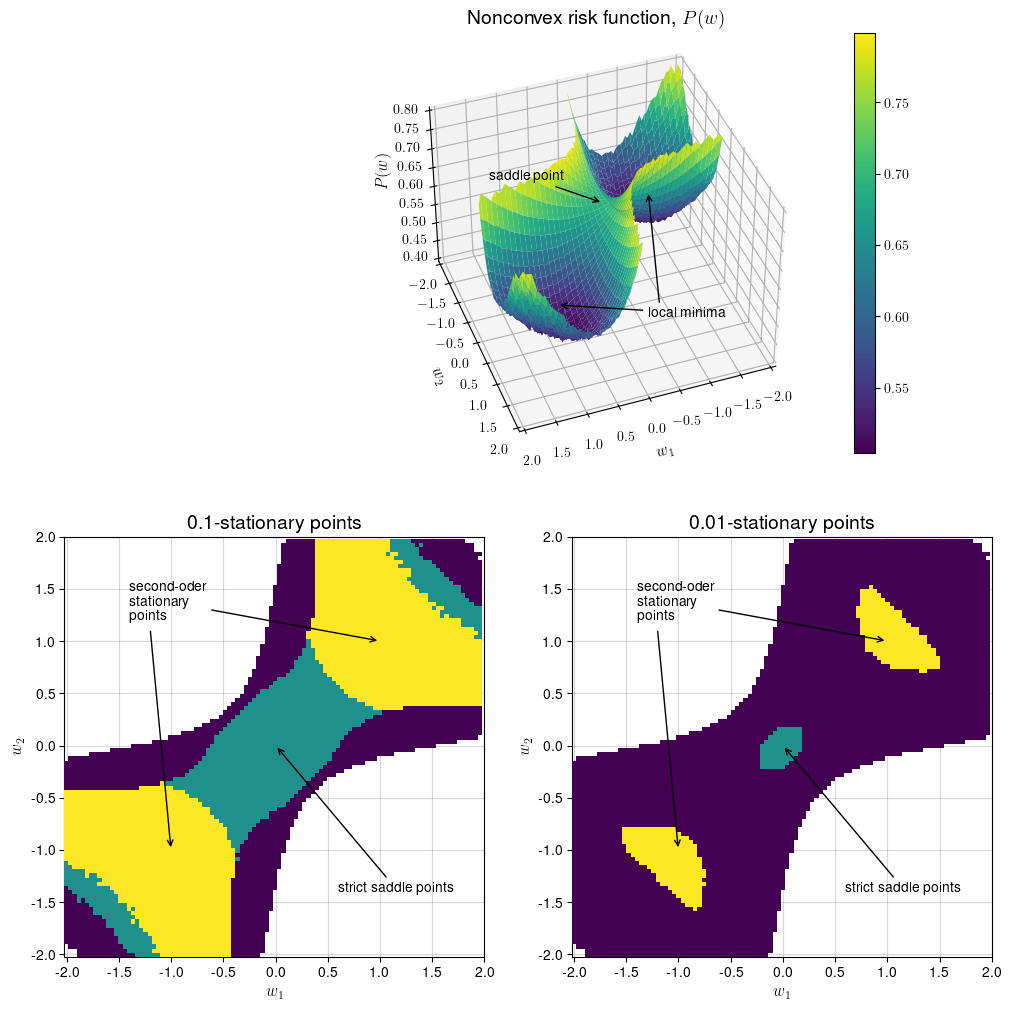

In [172]:
x = np.linspace(-plot_range, plot_range, nr_grids)
y = np.linspace(-plot_range, plot_range, nr_grids)
X, Y = np.meshgrid(x, y)

# Create figure 1

# in the matlab plot, it doesn't show the values which are greater than max_z but in pyhton 
# it does and it doesn't look good. that's why I masked the values greater than max_z
mask = z_mean > max_z
z_masked = np.ma.masked_array(z_mean, mask=mask)

color_map=np.array([[1, 0, 0], [1, 1, 0], [0, 1, 0]])

fig1 = plt.figure(figsize=(12,12))
ax1 = fig1.add_subplot(2, 2, (1, 2), projection='3d')
surf1 = ax1.plot_surface(X, Y, z_masked, cmap='viridis')
ax1.set_xlim(-plot_range, plot_range)
ax1.set_ylim(-plot_range, plot_range)
ax1.set_zlim(0.4, 0.8)
ax1.invert_yaxis()
ax1.invert_xaxis()
ax1.set_xlabel('$w_1$', fontsize=12)
ax1.set_ylabel('$w_2$', fontsize=12)
ax1.set_zlabel('$P(w)$', fontsize=12, rotation=90)
ax1.zaxis.set_rotate_label(False)
ax1.set_title('Nonconvex risk function, $P(w)$', fontsize=14)
ax1.view_init(elev=40, azim=-110) # change the axis orientation to fit the figure in the book
ax1.annotate('saddle point', xy=(0, 0.015), xytext= (-0.05, 0.025), 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold')
ax1.annotate('local minima', xy=(-0.02, -0.030), xytext= (0.02, -0.035), 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold')
ax1.annotate('', xy=(0.02, 0.020), xytext= (0.025, -0.030), 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold')
fig1.colorbar(surf1)

import matplotlib.colors as mcolors

# Define custom colors for values 1 and 2
colors_dict = {
    0: 'blue',  # Color for 0
    1: 'green', # Color for 1
    2: 'yellow' # Color for 2
}

# Create a custom colormap using ListedColormap
custom_cmap = mcolors.ListedColormap([color_map[i,:] for i in range(3)])

z_masked_1 = np.ma.masked_array(cust_color_1, mask=mask)

# Create figure 2
ax2 = fig1.add_subplot(2, 2, 4)
ax2.imshow(z_masked_1, zorder=3)
#surf2 = ax2.plot_surface(X, Y, z_masked, cmap='viridis')
ax2.set_yticks(np.arange(0, 100 + 100/8, 100/8))
ax2.set_xticks(np.arange(0, 100 + 100/8, 100/8))
ax2.set_yticklabels(np.arange(-plot_range, 2.5, 0.5))
ax2.set_xticklabels(np.arange(-plot_range, 2.5, 0.5))
ax2.invert_yaxis()
ax2.set_xlabel('$w_1$', fontsize=12)
ax2.set_ylabel('$w_2$', fontsize=12)
ax2.set_title(str(grad_thres_1) + '-stationary points', fontsize=14)
ax2.annotate('strict saddle points', xy=(50, 50), xytext= (65, 15), 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold')
ax2.annotate('second-oder \n stationary \n points', xy=(75, 75), xytext= (15, 80), 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold')
ax2.annotate('', xy=(25, 25), xytext= (20, 78), 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold')
plt.grid(zorder=0, alpha=0.5)
#fig2.colorbar(surf2, ticks=[0, 1, 2], ticklabels=['$\mathcal{S}^C$', '$\mathcal{U}$', '$\mathcal{D}$'], format=matplotlib.ticker.FuncFormatter(lambda val, loc: ['$\mathcal{S}^C$', '$\mathcal{U}$', '$\mathcal{D}$'][int(val)]))

# Create figure 3

z_masked_2 = np.ma.masked_array(cust_color_2, mask=mask)
ax3 = fig1.add_subplot(2, 2, 3,)
ax3.imshow(z_masked_2, zorder=3)

#surf3 = ax3.plot_surface(X, Y, z_mean, cmap=cust_color_2, cmap='viridis')
ax3.set_yticks(np.arange(0, 100 + 100/8, 100/8))
ax3.set_xticks(np.arange(0, 100 + 100/8, 100/8))
ax3.set_yticklabels(np.arange(-plot_range, 2.5, 0.5))
ax3.set_xticklabels(np.arange(-plot_range, 2.5, 0.5))
ax3.invert_yaxis()
ax3.set_xlabel('$w_1$', fontsize=12)
ax3.set_ylabel('$w_2$', fontsize=12)
ax3.set_title(str(grad_thres_2) + '-stationary points', fontsize=14)
ax3.annotate('strict saddle points', xy=(50, 50), xytext= (65, 15), 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold')
ax3.annotate('second-oder \n stationary \n points', xy=(75, 75), xytext= (15, 80), 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold')
ax3.annotate('', xy=(25, 25), xytext= (20, 78), 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold')
plt.grid(zorder=0, alpha=0.5)
#fig3.colorbar(surf3, ticks=[0, 1, 2], ticklabels=['$\mathcal{S}^C$', '$\mathcal{U}$', '$\mathcal{D}$'], format=matplotlib.ticker.FuncFormatter(lambda val, loc: ['$\mathcal{S}^C$', '$\mathcal{U}$', '$\mathcal{D}$'][int(val)]))

plt.savefig("figs/fig_2.pdf", format="pdf")

fig.tight_layout()

plt.show()

**Figure 24.2** A visual representation of first-order stationary, second-order stationary, and strict saddle points for a representative nonconvex risk surface with two local minimizers and one saddle point. The risk surface is shown in the top row for a two-dimensional vector $w$ with entries $\{w_1,w_2\}$; this surface originates from the data in future Example $24.2$. The plots in the bottom row correspond to the two values  $\tau=0.1$ (*left*) and $\tau=0.01$ (*right*). The color bar identifies the regions in $\mathbb{R}^2$ corresponding to the sets ${\cal D}$ and ${\cal U}$ defined in the next diagram. The parts in yellow correspond to desirable second-order stationary points in ${\cal D}$ while the parts in green correspond to undesirable strict saddle points in ${\cal U}$.}

We need to introduce one final condition on the gradient noise process, which is motivated as follows. Assume $w\in{\cal U}$ is some $\tau-$strict saddle point according to definition ($24.12$); that is, it is a point with a small gradient norm but is undesirable because it may correspond to a local maximum or a saddle point location. Let $R_g(w)$ denote the covariance matrix of the gradient noise at this particular location. We introduce the eigendecomposition of the Hessian matrix of $P(w)$ at the same location, namely, 

$$
\nabla_{w}^2\,P(w)\triangleq V\Lambda V^{\sf T} \tag{24.25}
$$

where $V$ is an orthogonal matrix and $\Lambda$ is a diagonal matrix; their values depend on  $w$. We order the entries of $\Lambda$ with its nonnegative entries coming first followed by its negative entries:

$$
\Lambda\triangleq \left[ \begin{array}{cc} {\Lambda}^{\geq 0} & 0\\0 & {\Lambda}^{< 0} \end{array}\right] \tag{24.26}
$$

where $ {\Lambda}^{\geq 0} \ge 0 $ and $ {\Lambda}^{< 0} < 0 $, i.e., these diagonal submatrices contain the nonnegative and negative eigenvalues of $\Lambda$, respectively. We also partition the columns of $V$ accordingly as 

$$
{V} \triangleq \left[ \begin{array}{cc} {V}^{\geq0} & {V}^{< 0} \end{array} \right] \tag{24.27}
$$

In this partitioning, the columns of $V^{<0}$ correspond to eigenvectors of $\nabla_{w}^2\,P(w)$ with negative eigenvalues. If we again consider a Taylor series expansion of the form ($24.7$) around the strict saddle location $w\in{\cal U}$, we get

$$
\begin{align*}
P(w+\Delta w)   \approx&\: P(w)+({\nabla_{w^{\sf T}} P(w)})^{\sf T} \Delta w + \frac{1}{2}{\Delta w}^{\sf T} \,\nabla_{w}^2 P(w)\, \Delta w \notag \\
\approx&\: P(w)+\frac{1}{2}{\Delta w}^{\sf T}\,\nabla_{w}^2 P(w)\, \Delta w \tag{24.28}
\end{align*}
$$

since at strict saddle points $ \nabla_{w}\,\, P(w) \approx 0 $. For every small perturbation $\Delta w  $ in the range of $ V^{<0} $, i.e., $ \Delta w = V^{<0} x $ for some vector $x$, we have 

$$
\Delta w^{\sf T} \,\nabla_{w}^2 P(w) \,\Delta w = x^{\sf T} \Bigl((V^{<0})^{\sf T}\, \nabla_{w}^2 P(w) V^{<0}\Bigr) x < 0 \tag{24.29}
$$

and, hence, we end up with the approximate inequality:

$$ 
P(w + \Delta w) \lessapprox P(w),\;\;\;\text{ for any small } \Delta w\in{\cal R}(V^{<0}) \tag{24.30}
$$

where ${\cal R}(V^{<0})$ refers to the range space of $V^o$. We conclude that the space spanned by $ V^{<0} $ around the strict saddle point $ w $ corresponds to local descent directions. For this reason,  we will assume that the covariance matrix of the gradient noise process satisfies the following condition at all strict saddle points:

$$
\begin{array}{c}
\lambda_{\min}\left\{{\left({V}^{< 0}\right)}^{\sf T} {R}_{g}\left(w \right) {V}^{< 0} \right\} \ge \sigma_{\ell}^2>0, \forall\,w\in{\cal U} \text{ (strict saddle points)}\\
\text{(persistent gradient noise components along directions in ${\cal R}(V^o)$)} \tag{24.31}
\end{array}
$$


for some uniform $ \sigma_{\ell}^2 $. This condition requires the presence of {*persistent*} gradient noise components along local descent directions spanned by $ {V}^{< 0} $ in the vicinity of strict saddle points --- see Fig. $24.4$. Condition ($24.31$) is not merely a technical requirement but is necessary for the algorithm to be able to escape saddle points.

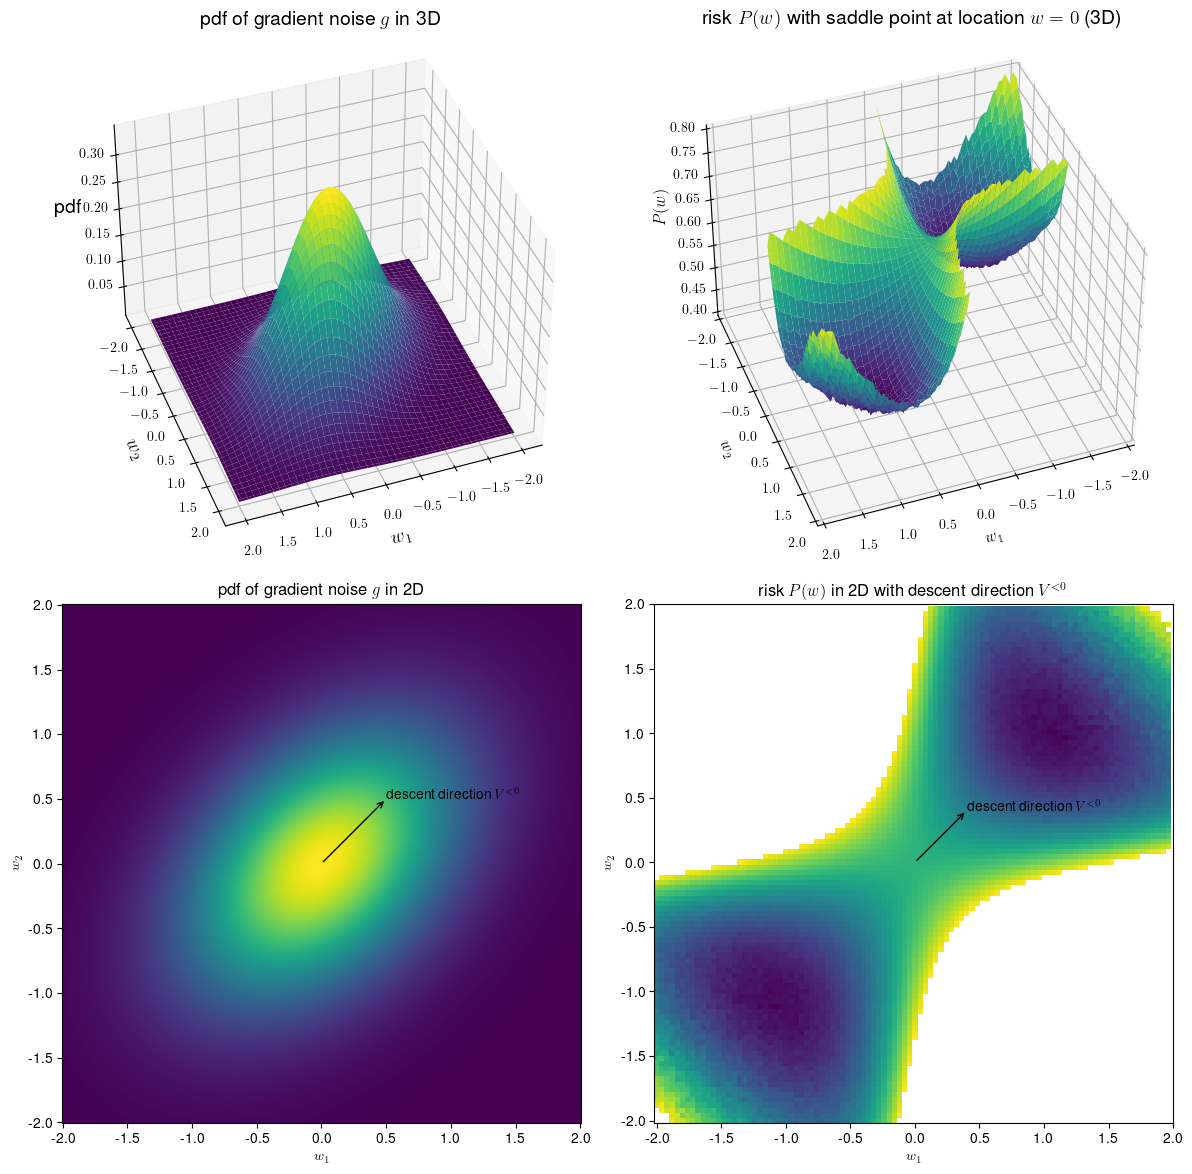

In [177]:
# generate part of figure 4
xbar = 0  # mean
varx = 1/2  # variance
ybar = 0  # mean
vary = 1/2  # variance
sxy = 0.2 
R = np.array([[varx, sxy],
     [sxy,  vary]])

p =2
mvec = np.array([xbar, ybar])
a = 1 / (np.sqrt((2 * np.pi) ** p))
a = a/np.sqrt(np.linalg.det(R))

# Create an empty array for 'g'
n_points = int(4.01 / 0.01 + 1)
g = np.zeros((n_points, n_points))

# Calculate 'g' values
n1 = 0
for x in np.arange(-2, 2.01, 0.01):
    m1 = 0
    for y in np.arange(-2, 2.01, 0.01):
        xvec = np.array([x, y])
        exponent = -0.5 * np.dot(np.dot((xvec - mvec), np.linalg.inv(R)), (xvec - mvec).T)
        g[n1, m1] = a * np.exp(exponent)
        m1 += 1
    n1 += 1

# Create a 3D plot
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(221, projection='3d')

x_vals = np.arange(-2, 2.01, 0.01)
y_vals = np.arange(-2, 2.01, 0.01)
X_, Y_ = np.meshgrid(x_vals, y_vals)

x = np.linspace(-plot_range, plot_range, nr_grids)
y = np.linspace(-plot_range, plot_range, nr_grids)
X, Y = np.meshgrid(x, y)

# Plot the 3D surface
surf = ax.plot_surface(X_, Y_, g, cmap='viridis')
ax.set_xlabel(r'$w_1$', fontsize=14)
ax.set_ylabel(r'$w_2$', fontsize=14)
ax.set_zlabel('pdf', fontsize=14)
ax.invert_yaxis()
ax.invert_xaxis()
ax.zaxis.set_rotate_label(False)
ax.view_init(elev=40, azim=-110)
ax.set_title('pdf of gradient noise $g$ in 3D', fontsize=14)

ax = fig.add_subplot(222, projection='3d')
surf1 = ax.plot_surface(X, Y, z_masked, cmap='viridis')
ax.set_xlim(-plot_range, plot_range)
ax.set_ylim(-plot_range, plot_range)
ax.set_zlim(0.4, 0.8)
ax.invert_yaxis()
ax.invert_xaxis()
ax.set_xlabel('$w_1$', fontsize=12)
ax.set_ylabel('$w_2$', fontsize=12)
ax.set_zlabel('$P(w)$', fontsize=12, rotation=90)
ax.zaxis.set_rotate_label(False)
ax.set_title('risk $P(w)$ with saddle point at location $w=0$ (3D)', fontsize=14)
ax.view_init(elev=40, azim=-110) # change the axis orientation to fit the figure in the book

ax = fig.add_subplot(223)
ax.imshow(g)
ax.set_title("pdf of gradient noise $g$ in 2D")
ax.set_yticklabels(np.arange(-plot_range-0.5, plot_range+0.5, 0.5))
ax.set_xticklabels(np.arange(-plot_range-0.5, plot_range+0.5, 0.5))
ax.set_xlabel("$w_1$")
ax.set_ylabel("$w_2$")
ax.invert_yaxis()
ax.annotate('', xy=(250, 250), xytext= (200, 200), 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold')
ax.annotate('descent direction $V^{<0}$', xy=(250, 250), fontweight='bold')

ax = fig.add_subplot(224)
ax.imshow(z_masked)
ax.set_title("risk $P(w)$ in 2D with descent direction $V^{<0}$")
ax.set_yticks(np.arange(0, 100 + 100/8, 100/8))
ax.set_xticks(np.arange(0, 100 + 100/8, 100/8))
ax.set_yticklabels(np.arange(-plot_range, 2.5, 0.5))
ax.set_xticklabels(np.arange(-plot_range, 2.5, 0.5))
ax.set_xlabel("$w_1$")
ax.set_ylabel("$w_2$")
ax.invert_yaxis()
ax.annotate('', xy=(60, 60), xytext= (50, 50), 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold')
ax.annotate('descent direction $V^{<0}$', xy=(60, 60), fontweight='bold')


fig.tight_layout()

plt.savefig("figs/fig_4.pdf")

plt.show()

**Figure 24.4** Visual illustration of condition ($24.31$). Examples in 3D of a probability density function for the gradient noise process $ \boldsymbol{g}_n(\boldsymbol{w}_{n-1}) $ (*top-left*) and risk function $ P(w) $ (*bottom-left*). The risk $ P(w) $  exhibits a strict saddle point at $ w = 0 $. A local descent direction is shown by the red arrows in the right column. Condition $24.31$ requires the presence of noise components along this direction.

## Example 24.2 (Training a classifier with a sigmoidal output)

We illustrate the operation of the stochastic gradient recursion ($24.18$) by applying it to the structure shown in Fig. $24.5$. The input vector $h\in \mathbb{R}^{M}$ is multiplied by a weighting matrix $W$ to generate $y=Wh\in \mathbb{R}^{J}$. The inner product of $y$ and $w$ generates the scalar $z$, which is fed into a sigmoidal function to produce the output signal $\widehat{\gamma}=f(z)$. The input--output mapping shown in the figure can be described by the relations:

$$
\left\{
\begin{array}{l}
y = Wh \\
z = w^{\sf T} y = w^{\sf T} Wh \\
\widehat{\gamma} = f(z)
\end{array}
\right. \tag{24.50}
$$

where $f(z)$ is the sigmoid activation function:

$$
\widehat{\gamma} = \frac{1}{1 + e^{-z}} \tag{24.51}
$$

In order to learn the weight parameters $\{w,W\}$, we will employ the following 
cross-entropy empirical risk:

$$
\begin{align*}
\mathcal{P}(w,W) &= \rho\|w\|_2^2 + \rho \|W_{1}\|_{\text{F}}^2 \\
&\quad - \frac{1}{N}\sum_{m=0}^{N}\left\{\gamma(m)\ln(\widehat{\gamma}(m)) + (1-\gamma(m))\ln(1-\widehat{\gamma}(m))\right\}
\end{align*} \tag{24.52}
$$

where we assume a collection of training points $\{\gamma(m),h_m\}$ with $h_m\in \mathbb{R}^M$ representing feature vectors and $\gamma(m)\in\{0,1\}$ representing the corresponding binary labels. We rewrite the rightmost term in the risk function in an equivalent form using the sigmoidal function as follows. We first note that 

$$
\begin{align*}
\gamma\ln(\widehat{\gamma})+(1-\gamma)\ln(1-\widehat{\gamma}) &=
\begin{cases}
    -\ln(1+e^{-w^{\sf T} Wh}), & \text{if } \gamma = 1 \\
    -\ln(1+e^{w^{\sf T} Wh}), & \text{if } \gamma = 0
\end{cases}
\end{align*} \tag{24.53}
$$

so that we can rewrite the empirical risk ($24.52$) in the alternative form:

$$
\;{\cal P}(w,W)=\rho\|w\|_2^2 +\rho \|W_{1}\|_{ F}^2+
\frac{1}{N}\sum_{m=0}^{N}
\ln\Bigl(1+e^{-(2\gamma(m)-1)w^{\sf T} Wh_m}\Bigr)\; \tag{24.54}
$$

From relations ($24.50$) we see that the mapping from $h$ to $z$ is linear since $z=a^{\sf T} h$, for some vector $a$. However, the vector $a$ is being represented in factored form, as the product $a=w^{\sf T} W$. This representation causes the empirical function $P(w,W)$ to become nonconvex over the parameters $\{w,W\}$ since they appear multiplied together.


We evaluate the gradients of ${\cal P}(w,W)$ with respect to $w$ and $W$. For the matrix $W$, we recall that the entries in the notation $\partial {\cal P}(w,W)/\partial W$ consist of the partial derivatives of  ${\cal P}(\cdot)$ relative to the individual entries of $W$. In this way, we have 
   
$$
\begin{align*}
\frac{\partial {\cal P}(w,W)}{\partial W} &= 2\rho W - \frac{1}{N}\sum_{m=0}^{N-1}\frac{(2\gamma(m)-1)w h_m^{\sf T}}{1+e^{(2\gamma(m)-1)w^{\sf T} Wh_m}} \\
\frac{\partial {\cal P}(w,W)}{\partial w} &= 2\rho w^{\sf T} - \frac{1}{N}\sum_{m=0}^{N-1}\frac{(2\gamma(m)-1)(Wh_m)^{\sf T}}{1+e^{(2\gamma(m)-1)w^{\sf T} Wh_m}}
\end{align*} \tag{24.55}
$$

These expressions provide the {\em true} gradients relative to the weight parameters. We can employ stochastic approximations for both gradients and update the parameter estimates by using:

$$
\text{select a pair } (\boldsymbol{\gamma}(n),\boldsymbol{h}_n) \text{ at random}
$$

$$
\boldsymbol{W}_{n} = (1-2\mu\rho)\boldsymbol{W}_{n-1}+\mu \dfrac{(2\boldsymbol{\gamma}(n)-1)\boldsymbol{w}_{n-1} \boldsymbol{h}_n^{\sf T}}{1+e^{(2\boldsymbol{\gamma}(n)-1)\boldsymbol{w}_{n-1}^{\sf T} \boldsymbol{W}_{n-1}\boldsymbol{h}_n}}
$$
$$
\boldsymbol{w}_{n} = (1-2\mu\rho)\boldsymbol{w}_{n-1} +\mu \dfrac{(2\boldsymbol{\gamma}(n)-1)\boldsymbol{W}_{n-1}\boldsymbol{h}_n}{1+e^{(2\boldsymbol{\gamma}(n)-1)\boldsymbol{w}_{n-1}^{\sf T} \boldsymbol{W}_{n-1}\boldsymbol{h}_n}}
\tag{24.56}
$$

Next, the Hessian matrix of ${\cal P}(w,W)$ at the origin $(w=0, W=0)$ is denoted by ${\cal H}$ and is given by

$$
{\cal H} =
\begin{bmatrix}
2\rho I_{M} & -\dfrac{1}{2N}\displaystyle\sum_{m=0}^{N-1} (2\gamma(m)-1)h_m \\
- \dfrac{1}{2N}\displaystyle\sum_{m=0}^{N-1} (2\gamma(m)-1)h_m^{\sf T} & 2\rho 
\end{bmatrix} \tag{24.57}
$$

The $(1,1)$ block is positive-definite and equal to $2\rho I_M$. The Schur complement relative to this block  is given by

$$
\Delta=2\rho - \frac{1}{2\rho} \left(\dfrac{1}{4N^2}\displaystyle\sum_{m'=0}^{N-1} \sum_{m=0}^{N-1}(2\gamma(m')-1)(2\gamma(m)-1)h_{m'}^{\sf T} h_m\right) \tag{24.58}
$$

This Schur complement will be negative-definite for small enough regularization parameter $\rho$ chosen to satisfy

$$
4\rho^2\leq \dfrac{1}{4N^2}\displaystyle\sum_{m'=0}^{N-1} \sum_{m=0}^{N-1}(2\gamma(m')-1)(2\gamma(m)-1)h_{m'}^{\sf T} h_m \tag{24.59}
$$

Assume that $\rho$ satisfies this condition. Then, the Hessian matrix of ${\cal P}(w,W)$ will be indefinite at the location 
$(w=0,W=0)$, having both negative and positive eigenvalues. It follows that this location will be a  strict saddle point with some descent directions associated with it. However, we observe from 
($24.55$) and ($24.56a$)--($24.56b$) that both the true and approximate gradients are zero at $(w=0,W=0)$. This implies that the gradient noise is also zero at this location, which means that   the gradient noise induced by the stochastic gradient construction  will not have a component in any of the descent directions at the origin.  Hence, initializing the algorithm  at $(w = 0, W=0)$  would cause it to remain there with probability 1. This suggests that condition 24.31 is not merely a technical requirement but indeed necessary. To satisfy the assumption, we will instead run the stochastic gradient recursions ($24.56a$)--($24.56b$)  by adding a small noise perturbation to each gradient approximation.
 
We illustrate these conclusions by running a contrived example in order to enable visualization of the trajectories. We let $M=1$ and $J=1$ so that the input feature $h_n$ is a scalar and both $w$ and $W$ are also scalars. The stochastic gradient recursions ($24.56a$)--($24.56b$) can be written as:

$$
\begin{bmatrix}
\boldsymbol{W}_{n} \\
\boldsymbol{w}_{n}
\end{bmatrix}
=
(1-2\mu\rho)
\begin{bmatrix}
\boldsymbol{W}_{n-1} \\
\boldsymbol{w}_{n-1}
\end{bmatrix}
+
\dfrac{\mu (2\boldsymbol{\gamma}(n)-1)\boldsymbol{h}_n}{1+e^{(2\boldsymbol{\gamma}(n)-1)\boldsymbol{w}_{n-1} \boldsymbol{W}_{n-1}\boldsymbol{h}_n}}
\begin{bmatrix}
\boldsymbol{w}_{n-1} \\
\boldsymbol{W}_{n-1}
\end{bmatrix} \tag{24.60}
$$
 
We set $\rho=0.05$ and generate random labels $\boldsymbol{\gamma}(n)\in\{0,1\}$ with equal probability. We also generate the corresponding feature vectors from a Gaussian distribution as follows:

$$
\left\{\begin{array}{ll}
\boldsymbol{h}_n\sim {\cal N}_{\boldsymbol{h}_n}(+1,1),&\text{ if } \boldsymbol{\gamma}(n)=1\\
\boldsymbol{h}_n\sim {\cal N}_{\boldsymbol{h}_n}(-1,1),&\text{ if } \boldsymbol{\gamma}(n)=0
\end{array}
\right. \tag{24.61}
$$

Under these conditions, it is clear that $\mathbb{E}(2\boldsymbol{\gamma}(n)-1)\boldsymbol{h}_n=1$ so that by ergodicity and for large sample size $N$:

$$
\dfrac{1}{2N}\displaystyle\sum_{m=0}^{N-1} (2\gamma(m)-1)h_m\rightarrow \frac{1}{2},\;\;\;N\rightarrow \infty \tag{24.62}
$$

and, hence, the Hessian matrix at the origin becomes 

$$
{\cal H}\approx
\begin{bmatrix}
0.1 & -0.5 \\
-0.5 & 0.1
\end{bmatrix} \tag{24.63}
$$

which has an eigenvalue at $ -0.4 $ with corresponding eigenvector $ \mathrm{col}\left\{ 1, 1 \right\} $. This implies that $w = W = 0 $ is a strict saddle point with local descent direction $ \mathrm{col}\left\{ 1, 1 \right\} $. To satisfy condition 24.31, we perturb the update direction in ($24.60$) by adding  $\mu  \boldsymbol{v}\, \text{ col}\{1,1\}$ where $ \boldsymbol{v}\sim{\cal N}_{ \boldsymbol{v}}(0,1)$. This step ensures that gradient noise is present in the descent direction around the strict saddle point at $ w = W = 0 $. 


The risk surface is depicted on the left in Fig. $24.6$. It can be observed from the figure, and also analytically verified, that ${\cal P}(w,W)$ has two local minima in the positive and negative quadrants, respectively, and a single saddle point at $ w=W= 0 $. One realization of the trajectory $(w_{n},W_{n})$ is shown in the same figure on the right converging toward a local minimum. The plots are generated using $\mu=0.0001$ and $N=10,000$ data points. The stochastic gradient recursions are run for $100,000$ iterations. 

In [2]:
#mat = np.load('surface.npz')
mat = scipy.io.loadmat('data/surface.mat')
x = mat['x']
y = mat['y']
z_mean = mat['z_mean']

0
0.01


100%|██████████| 99999/99999 [00:51<00:00, 1924.63it/s]


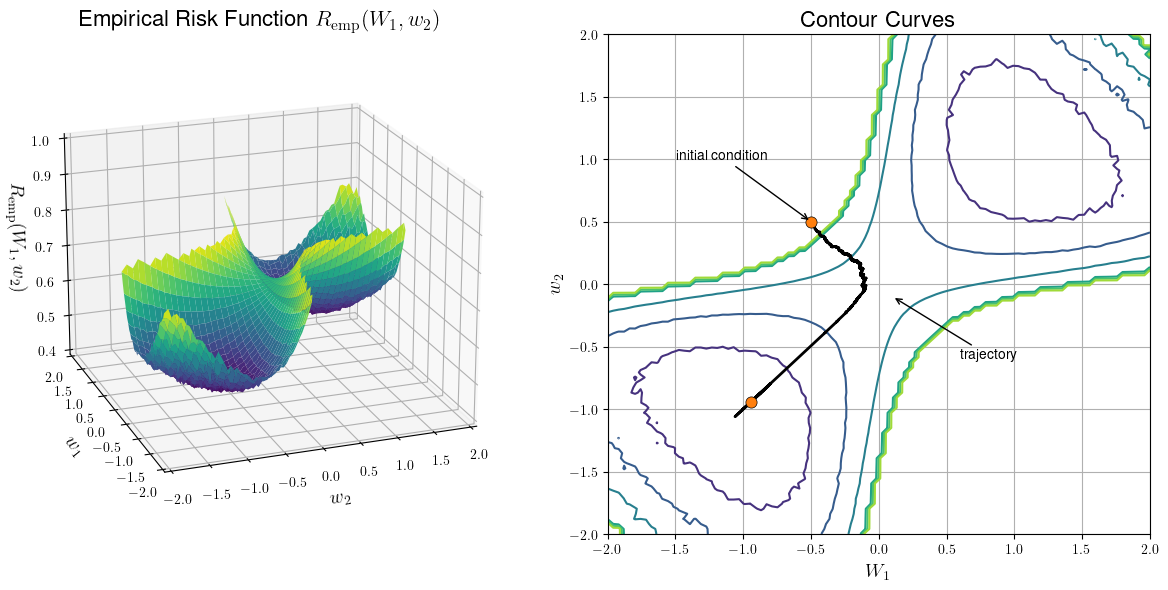

In [201]:
MC = 1
nr_iter = 100000
nr_average = 100
sigma = 1
mu = 0.01
mu_small = 0.001
mu_smaller = 0.0001 # we will show the trajectory for this smaller step-size
rho_1 = 0.1 # this rho is 2x the rho in my notes
rho_2 = 0.1
rho = 0.1
nr_agents = 1
p = 0.25

if nr_agents > 1:
    lambda_2 = 1
    while lambda_2 >= 0.91 or lambda_2 <= 0.9:
        locs = np.random.rand(2, nr_agents)
        A = np.zeros((nr_agents, nr_agents))
        for agent in range(nr_agents):
            for agent_2 in range(nr_agents):
                if np.linalg.norm(locs[:, agent] - locs[:, agent_2]) <= p:
                    A[agent, agent_2] = 1

        for i in range(nr_agents):
            A[:, i] = A[:, i] / np.sum(A[:, i])

        V, D = np.linalg.eig(A)
        d = np.sort(np.abs(np.diag(D)))
        lambda_2 = np.linalg.norm(d[1])
        p = V[:, 1]/np.sum(V[:, 1])
else:
    A = 1
    lambda_2 = 0
    p = 1

print(lambda_2)
calA = np.kron(A, np.eye(2))

nr_grids = 100
plot_range = 2
max_z = 1
x = np.linspace(-plot_range, plot_range, nr_grids)
y = np.linspace(-plot_range, plot_range, nr_grids)
z_mean[z_mean>=max_z] = max_z+ .01
X, Y = np.meshgrid(x, y)

# in the matlab plot, it doesn't show the values which are greater than max_z but in pyhton 
# it does and it doesn't look good. that's why I masked the values greater than max_z
mask = z_mean > max_z
z_masked = np.ma.masked_array(z_mean, mask=mask)

# figure 6 (plots used to generate figure 6)
# Plotting figure 6 - Empirical risk function
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
surf = ax.plot_surface(X, Y, z_masked, cmap='viridis')
ax.set_xlim(-plot_range, plot_range)
ax.set_ylim(-plot_range, plot_range)
ax.set_zlim(0.4, max_z)
ax.set_xlabel('$w_2$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_zlabel('$R_{\mathrm{emp}}(W_1, w_2)$', fontsize=14)
ax.set_title('Empirical Risk Function $R_{\mathrm{emp}}(W_1, w_2)$', fontsize=16)
ax.view_init(elev=20, azim=-110) # change the axis orientation to fit the figure in the book

#plt.show()

# Plotting contour surface
ax = fig.add_subplot(122)
ax.contour(X, Y, z_mean)
ax.set_xlim(-plot_range, plot_range)
ax.set_ylim(-plot_range, plot_range)
ax.set_xlabel('$W_1$', fontsize=14)
ax.set_ylabel('$w_2$', fontsize=14)
ax.set_title('Contour Curves', fontsize=16)
plt.grid()

onePT = np.ones((nr_agents, 1)) * p
onePTcal = np.kron(onePT, np.eye(2))

calW = np.zeros((2 * nr_agents, nr_iter, MC))
centW = np.zeros((2 * nr_agents, nr_iter, MC))
deviation = np.zeros((nr_iter, MC))
function_value = np.zeros((nr_iter, MC))
function_value_nonoise = np.zeros((nr_iter, MC))
function_value_small = np.zeros((nr_iter, MC))
function_value_smaller = np.zeros((nr_iter, MC))
function_value_uniformnoise = np.zeros((nr_iter, MC))

print(mu)

mu = mu_small

for mc in range(MC):
    calW[:, 0, mc] = 2 * np.random.rand(2 * nr_agents) - 1
    if nr_agents == 1:
        calW[:, 0, mc] = [-0.5, 0.5]
    for i in tqdm(range(1, nr_iter)):
        for agent in range(nr_agents):
            label = np.sign(np.random.randn())
            feature = np.random.normal(label, sigma)
            v = np.random.normal(0, 1)
            indices = np.arange(2*agent, 2*agent+2)
            calW[indices[0], i, mc] = (1 - mu * rho_1) * calW[indices[0], i - 1, mc] + mu * (
                        label * calW[indices[1], i - 1, mc] * feature) / (
                                               np.exp(label * calW[indices[0], i - 1, mc] * calW[indices[1], i - 1, mc] * feature))
            calW[indices[0], i, mc] = calW[indices[0], i, mc] + mu * v
            calW[indices[1], i, mc] = (1 - mu * rho_2) * calW[indices[1], i - 1, mc] + mu * (
                        label * calW[indices[0], i - 1, mc] * feature) / (
                                               np.exp(label * calW[indices[0], i - 1, mc] * calW[indices[1], i - 1, mc] * feature))
            calW[indices[1], i, mc] = calW[indices[1], i, mc] + mu * v
        centW[:, i, mc] = calW[:, i, mc]
        to_average = np.zeros(nr_average)
        for ave in range(nr_average):
            label = np.sign(np.random.randn())
            feature = np.random.normal(label, sigma)
            to_average[ave] = np.log(1 + np.exp(
                -label * centW[0, i, mc] * centW[1, i, mc] * feature)) + 0.5 * rho_1 * centW[0, i, mc] ** 2 + 0.5 * rho_2 * centW[
                                   1, i, mc] ** 2
        function_value_small[i, mc] = np.mean(to_average)

ax.plot(centW[0, 1:, 0], centW[1, 1:, 0], linewidth=2, color="black")

init_point = (centW[0, 1:, 0][0], centW[1, 1:, 0][0])
end_point = (centW[0, 1:, 0][-1], centW[1, 1:, 0][-1])

ax.scatter(x=[init_point[0], end_point[0]], y=[init_point[-1], end_point[-1]], zorder=3, c="tab:orange", s=65, edgecolors="black", linewidths=0.5)

ax.annotate('initial condition', xy=init_point, xytext=(init_point[0]-1, init_point[1]+0.5), 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold')

ax.annotate('trajectory', xy=(0.1, -0.1), xytext=(0.6, -0.6), 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold')

fig.tight_layout()

plt.savefig("figs/fig_6.pdf", format="pdf")

In [181]:
centW[0, 1:, 0], centW[1, 1:, 0].shape

(array([-4.70682385e-001, -4.65712837e-001, -4.59857908e-001, ...,
        -4.44659081e-323, -4.44659081e-323, -4.44659081e-323]),
 (99999,))

**Figure 24.6** The risk surface on the left has one saddle point at the origin and two local minima in the positive and negative quadrants. The plot on the right shows the contour curves and a trajectory converging toward a local minimum.